This notebook pulls together many features for all the docking stations and then a variety of linear models are run to try and predict the total amount of journeys made at each docking station. The totals used in the target column are the total number of journeys either beginning or ending at each docking station during 2019.

# Import libraries and data

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [360]:
data = pd.read_csv("clean_combined_wards.csv")

In [361]:
data.head()

,latitude_x,longitude_x,description_code_x,oa11,laua,ward,lsoa11,msoa11,oac11,elevation,nearest_bus,nearest_tube,nearest_rail,total_usage,ward_name,old_code,newcode,population_-_2015,children_aged_0-15_-_2015,working-age_(16-64)_-_2015,older_people_aged_65+_-_2015,%_all_children_aged_0-15_-_2015,%_all_working-age_(16-64)_-_2015,%_all_older_people_aged_65+_-_2015,mean_age_-_2013,median_age_-_2013,area_-_square_kilometres,population_density_(persons_per_sq_km)_-_2013,%_bame_-_2011,%_not_born_in_uk_-_2011,%_english_is_first_language_of_no_one_in_household_-_2011,general_fertility_rate_-_2013,male_life_expectancy_-2009-13,female_life_expectancy_-2009-13_,%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14,"rate_of_all_ambulance_incidents_per_1,000_population_-_2014",rates_of_ambulance_call_outs_for_alcohol_related_illness_-_2014,number_killed_or_seriously_injured_on_the_roads_-_2014,in_employment_(16-64)_-_2011,employment_rate_(16-64)_-_2011,number_of_jobs_in_area_-_2013,employment_per_head_of_resident_wa_population_-_2013,rate_of_new_registrations_of_migrant_workers_-_2011/12,median_house_price_(£)_-_2014,number_of_properties_sold_-_2014,median_household_income_estimate_(2012/13),number_of_household_spaces_-_2011,%_detached_houses_-_2011,%_semi-detached_houses_-_2011,%_terraced_houses_-_2011,"%_flat,_maisonette_or_apartment_-_2011",%_households_owned_-_2011,%_households_social_rented_-_2011,%_households_private_rented_-_2011,%_dwellings_in_council_tax_bands_a_or_b_-_2015,"%_dwellings_in_council_tax_bands_c,_d_or_e_-_2015","%_dwellings_in_council_tax_bands_f,_g_or_h_-_2015",claimant_rate_of_key_out-of-work_benefits_(working_age_client_group)_(2014),claimant_rate_of_housing_benefit_(2015),claimant_rate_of_employment_support_allowance_-_2014,rate_of_jobseekers_allowance_(jsa)_claimants_-_2015,%_dependent_children_(0-18)_in_out-of-work_households_-_2014,%_of_households_with_no_adults_in_employment_with_dependent_children_-_2011,%_of_lone_parents_not_in_employment_-_2011,(id2010)_-_rank_of_average_score_(within_london)_-_2010,(id2010)_%_of_lsoas_in_worst_50%_nationally_-_2010,average_gcse_capped_point_scores_-_2014,unauthorised_absence_in_all_schools_(%)_-_2013,%_with_no_qualifications_-_2011,%_with_level_4_qualifications_and_above_-_2011,a-level_average_point_score_per_student_-_2013/14,a-level_average_point_score_per_entry;_2013/14,crime_rate_-_2014/15,violence_against_the_person_rate_-_2014/15,"deliberate_fires_per_1,000_population_-_2014",%_area_that_is_open_space_-_2014,cars_per_household_-_2011,average_public_transport_accessibility_score_-_2014,%_travel_by_bicycle_to_work_-_2011,turnout_at_mayoral_election_-_2012
0,51.546805,-0.014691,U,E00175033,E09000025,E05000492,E01033583,E02000726,3A2,11.602027,327.746258,312.783075,384.236513,23901.0,Newham - Stratford and New Town,00BBGU,E05000492,26700,3700,21750,1250,13.9,81.4,4.7,31.5,29,4.2,5333.3,59.2,54.9,23.5,41.7,77.7,83.3,11.3,23.0,233.1,1.9,8,9665,68.9,24800.0,1.4,88.1,280000.0,231,35840,7567,3.4,5.8,21.0,69.6,19.8,31.8,42.5,26.7,73.2,0.1,17.8,11.4,2.6,2.4,21.5,5.0,44.1,32,100.0,308.9,1.5,13.9,40.6,604.2,202.4,240.9,37.8,0.8,44.7,0.4,5.8,2.4,24.3
1,51.546326,-0.009935,R,E00175033,E09000025,E05000492,E01033583,E02000726,3A2,10.971622,48.194791,92.956149,131.334824,25090.0,Newham - Stratford and New Town,00BBGU,E05000492,26700,3700,21750,1250,13.9,81.4,4.7,31.5,29,4.2,5333.3,59.2,54.9,23.5,41.7,77.7,83.3,11.3,23.0,233.1,1.9,8,9665,68.9,24800.0,1.4,88.1,280000.0,231,35840,7567,3.4,5.8,21.0,69.6,19.8,31.8,42.5,26.7,73.2,0.1,17.8,11.4,2.6,2.4,21.5,5.0,44.1,32,100.0,308.9,1.5,13.9,40.6,604.2,202.4,240.9,37.8,0.8,44.7,0.4,5.8,2.4,24.3
2,51.549369,-0.015717,R,E00175033,E09000025,E05000492,E01033583,E02000726,3A2,12.465042,472.097340,557.221061,633.254611,23204.0,Newham - Stratford and New Town,00BBGU,E05000492,26700,3700,21750,1250,13.9,81.4,4.7,31.5,29,4.2,5333.3,59.2,54.9,23.5,41.7,77.7,83.3,11.3,23.0,233.1,1.9,8,9665

Drop Identifiers

In [362]:
data = data.drop(["latitude_x", "longitude_x"], axis=1)

*Check data types and data shape*

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 79 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   description_code_x                                                           785 non-null    object 
 1   oa11                                                                         785 non-null    object 
 2   laua                                                                         785 non-null    object 
 3   ward                                                                         785 non-null    object 
 4   lsoa11                                                                       785 non-null    object 
 5   msoa11                                                                       785 non-null    object 
 6   oac11                                     

*Describing the data*

In [364]:
data.describe(include = 'all')

,description_code_x,oa11,laua,ward,lsoa11,msoa11,oac11,elevation,nearest_bus,nearest_tube,nearest_rail,total_usage,ward_name,old_code,newcode,population_-_2015,children_aged_0-15_-_2015,working-age_(16-64)_-_2015,older_people_aged_65+_-_2015,%_all_children_aged_0-15_-_2015,%_all_working-age_(16-64)_-_2015,%_all_older_people_aged_65+_-_2015,mean_age_-_2013,median_age_-_2013,area_-_square_kilometres,population_density_(persons_per_sq_km)_-_2013,%_bame_-_2011,%_not_born_in_uk_-_2011,%_english_is_first_language_of_no_one_in_household_-_2011,general_fertility_rate_-_2013,male_life_expectancy_-2009-13,female_life_expectancy_-2009-13_,%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14,"rate_of_all_ambulance_incidents_per_1,000_population_-_2014",rates_of_ambulance_call_outs_for_alcohol_related_illness_-_2014,number_killed_or_seriously_injured_on_the_roads_-_2014,in_employment_(16-64)_-_2011,employment_rate_(16-64)_-_2011,number_of_jobs_in_area_-_2013,employment_per_head_of_resident_wa_population_-_2013,rate_of_new_registrations_of_migrant_workers_-_2011/12,median_house_price_(£)_-_2014,number_of_properties_sold_-_2014,median_household_income_estimate_(2012/13),number_of_household_spaces_-_2011,%_detached_houses_-_2011,%_semi-detached_houses_-_2011,%_terraced_houses_-_2011,"%_flat,_maisonette_or_apartment_-_2011",%_households_owned_-_2011,%_households_social_rented_-_2011,%_households_private_rented_-_2011,%_dwellings_in_council_tax_bands_a_or_b_-_2015,"%_dwellings_in_council_tax_bands_c,_d_or_e_-_2015","%_dwellings_in_council_tax_bands_f,_g_or_h_-_2015",claimant_rate_of_key_out-of-work_benefits_(working_age_client_group)_(2014),claimant_rate_of_housing_benefit_(2015),claimant_rate_of_employment_support_allowance_-_2014,rate_of_jobseekers_allowance_(jsa)_claimants_-_2015,%_dependent_children_(0-18)_in_out-of-work_households_-_2014,%_of_households_with_no_adults_in_employment_with_dependent_children_-_2011,%_of_lone_parents_not_in_employment_-_2011,(id2010)_-_rank_of_average_score_(within_london)_-_2010,(id2010)_%_of_lsoas_in_worst_50%_nationally_-_2010,average_gcse_capped_point_scores_-_2014,unauthorised_absence_in_all_schools_(%)_-_2013,%_with_no_qualifications_-_2011,%_with_level_4_qualifications_and_above_-_2011,a-level_average_point_score_per_student_-_2013/14,a-level_average_point_score_per_entry;_2013/14,crime_rate_-_2014/15,violence_against_the_person_rate_-_2014/15,"deliberate_fires_per_1,000_population_-_2014",%_area_that_is_open_space_-_2014,cars_per_household_-_2011,average_public_transport_accessibility_score_-_2014,%_travel_by_bicycle_to_work_-_2011,turnout_at_mayoral_election_-_2012
count,785,785,785,785,785,785,785,785.000000,785.000000,785.000000,785.000000,785.000000,785,785,785,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,682.000000,728.000000,785.000000,785.000000,785.000000,785.000000,785.000000,782.000000,782.000000,785.000000,7.850000e+02,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,744.000000,785.000000,785.000000,785.000000,785.000000,785.000000
unique,7,635,12,104,439,153,18,NaN,NaN,NaN,NaN,NaN,104,104,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R,E00023930,E09000033,E09000001,E01032739,E02000001,2D3,NaN,NaN,NaN,NaN,NaN,City of London,00AA,E09000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Cleaning and Standardizing Columns


*Standardizing names*

In [365]:
def clean_columns(x):
    x = x.lower().strip().replace(' ', '_')
    return x

data.columns = list(map(clean_columns, data.columns))
data.columns

Index(['description_code_x', 'oa11', 'laua', 'ward', 'lsoa11', 'msoa11',
       'oac11', 'elevation', 'nearest_bus', 'nearest_tube', 'nearest_rail',
       'total_usage', 'ward_name', 'old_code', 'newcode', 'population_-_2015',
       'children_aged_0-15_-_2015', 'working-age_(16-64)_-_2015',
       'older_people_aged_65+_-_2015', '%_all_children_aged_0-15_-_2015',
       '%_all_working-age_(16-64)_-_2015',
       '%_all_older_people_aged_65+_-_2015', 'mean_age_-_2013',
       'median_age_-_2013', 'area_-_square_kilometres',
       'population_density_(persons_per_sq_km)_-_2013', '%_bame_-_2011',
       '%_not_born_in_uk_-_2011',
       '%_english_is_first_language_of_no_one_in_household_-_2011',
       'general_fertility_rate_-_2013', 'male_life_expectancy_-2009-13',
       'female_life_expectancy_-2009-13_',
       '%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14',
       '%_children_in_year_6_who_are_obese-_2011/12_to_2013/14',
       'rate_of_all_ambulance_incidents

*Checking for and replacing null values*

In [366]:
data.isnull().sum()

description_code_x                                                               0
oa11                                                                             0
laua                                                                             0
ward                                                                             0
lsoa11                                                                           0
msoa11                                                                           0
oac11                                                                            0
elevation                                                                        0
nearest_bus                                                                      0
nearest_tube                                                                     0
nearest_rail                                                                     0
total_usage                                                                      0
ward

In [367]:
data=data.drop(["%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14"], axis=1)

for i in data[["%_children_in_year_6_who_are_obese-_2011/12_to_2013/14", "deliberate_fires_per_1,000_population_-_2014", "employment_per_head_of_resident_wa_population_-_2013", "number_of_jobs_in_area_-_2013"]].columns: #choose the columns with null values
    med = data[i].median()
    data[i] = data[i].fillna(med)

In [368]:
data.isnull().sum()

description_code_x                                                             0
oa11                                                                           0
laua                                                                           0
ward                                                                           0
lsoa11                                                                         0
msoa11                                                                         0
oac11                                                                          0
elevation                                                                      0
nearest_bus                                                                    0
nearest_tube                                                                   0
nearest_rail                                                                   0
total_usage                                                                    0
ward_name                   

*Export cleaned data to csv*

In [369]:
#data.to_csv('data_clean_linear_regression.csv', index=False)

In [375]:
data.shape

(778, 78)

# Exploration on Numericals

In [376]:
#separate target column
y = data["total_usage"]
data = data.drop(["total_usage"], axis=1)

In [377]:
num = data[data.select_dtypes(np.number).columns]
num.shape

(778, 67)

*Check multicollinearity*

In [378]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = {}
num_vif = num.copy()
num_vif= add_constant(num)

In [478]:
for i in np.arange(num_vif.shape[1]):
    column_name = num_vif.columns[i]
    value = variance_inflation_factor(np.array(num_vif), i)
    vif[column_name] = value
vif

{'const': 31110919.18070425,
 'elevation': 5.226636934737616,
 'nearest_bus': 1.225188233573287,
 'nearest_tube': 2.7667295058704244,
 'nearest_rail': 2.2876558448047724,
 'population_-_2015': 71517.01717644666,
 'children_aged_0-15_-_2015': 5092.419488667656,
 'working-age_(16-64)_-_2015': 45923.04145413951,
 'older_people_aged_65+_-_2015': 237.24738920607078,
 '%_all_children_aged_0-15_-_2015': 24962.267169721006,
 '%_all_working-age_(16-64)_-_2015': 26381.96304654088,
 '%_all_older_people_aged_65+_-_2015': 17865.49070704244,
 'mean_age_-_2013': 563.5593404128515,
 'median_age_-_2013': 192.7639292124257,
 'area_-_square_kilometres': 75.1239972496332,
 'population_density_(persons_per_sq_km)_-_2013': 16.536519284673723,
 '%_bame_-_2011': 58.47959010790327,
 '%_not_born_in_uk_-_2011': 107.3852096554947,
 '%_english_is_first_language_of_no_one_in_household_-_2011': 76.51851416785193,
 'general_fertility_rate_-_2013': 23.286941153130865,
 'male_life_expectancy_-2009-13': 14.8352575666140

In [380]:
#keep the columns with v < 20
{k: v for k, v in vif.items() if v < 20}

{'elevation': 5.226636934737616,
 'nearest_bus': 1.225188233573287,
 'nearest_tube': 2.7667295058704244,
 'nearest_rail': 2.2876558448047724,
 'population_density_(persons_per_sq_km)_-_2013': 16.536519284673723,
 'male_life_expectancy_-2009-13': 14.835257566614063,
 'female_life_expectancy_-2009-13_': 7.754969989554223,
 '%_children_in_year_6_who_are_obese-_2011/12_to_2013/14': 5.141555584991629,
 'rate_of_new_registrations_of_migrant_workers_-_2011/12': 12.23030220718919,
 'number_of_properties_sold_-_2014': 12.60833609946494,
 '%_of_lone_parents_not_in_employment_-_2011': 19.727725718758144,
 'average_gcse_capped_point_scores_-_2014': 5.6457939561451385,
 'unauthorised_absence_in_all_schools_(%)_-_2013': 6.498782744247975,
 'a-level_average_point_score_per_student_-_2013/14': 10.307728977441345,
 'a-level_average_point_score_per_entry;_2013/14': 7.3072971108313105,
 'deliberate_fires_per_1,000_population_-_2014': 7.686930536960359,
 '%_area_that_is_open_space_-_2014': 10.078374787117

In [381]:
num_columns = list({k for (k, v) in vif.items() if v < 20})

In [382]:
num=num[num_columns]

In [383]:
num.shape

(778, 19)

*Checking Multicollinearity of remaining columns using a heatmap*

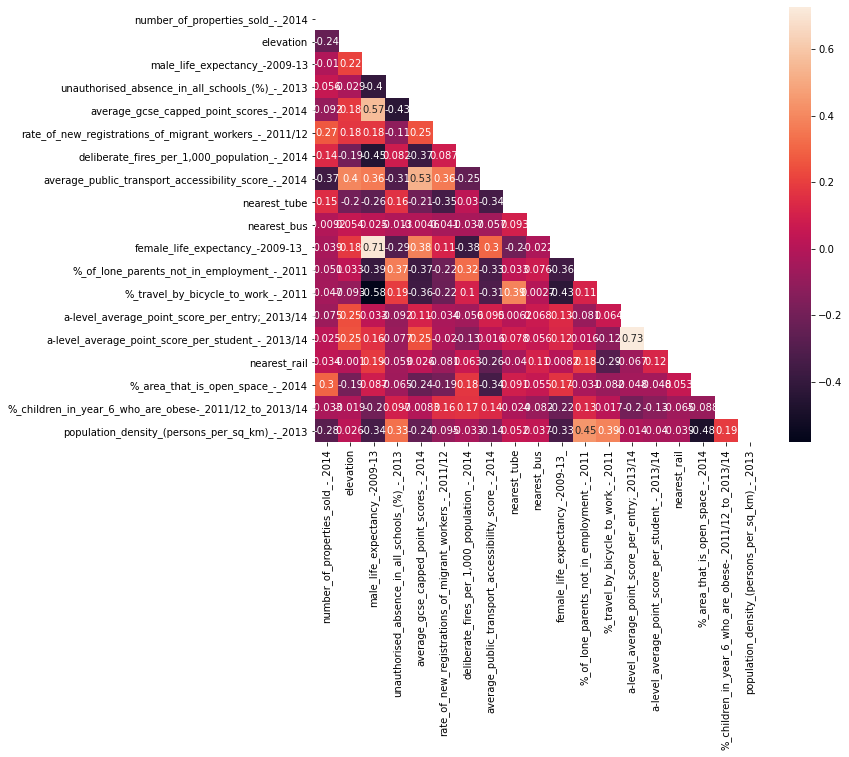

In [384]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [385]:
#drop columns with value > 0.7
num=num.drop(['a-level_average_point_score_per_student_-_2013/14', 'male_life_expectancy_-2009-13' ], axis=1)

*Check Variance of remaining columns*

In [386]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.9))
temp = sel.fit_transform(num)
temp = pd.DataFrame(temp)
print(num.shape)
print(temp.shape)

(778, 17)
(778, 15)


In [387]:
#only keep the 15 columns that are not dropped due to too little variance
num = num[num.columns[sel.get_support()]]

In [388]:
num.shape

(778, 15)

*Check correlation of remaining columns with target*

In [389]:
num_y=pd.concat([num, y], axis=1)

In [390]:
num_y[num_y.columns[1:]].corr()['total_usage'][:]

elevation                                                 0.072619
average_gcse_capped_point_scores_-_2014                   0.212948
rate_of_new_registrations_of_migrant_workers_-_2011/12    0.198562
average_public_transport_accessibility_score_-_2014       0.363849
nearest_tube                                             -0.153173
nearest_bus                                              -0.075445
female_life_expectancy_-2009-13_                          0.146601
%_of_lone_parents_not_in_employment_-_2011               -0.220970
%_travel_by_bicycle_to_work_-_2011                       -0.103570
a-level_average_point_score_per_entry;_2013/14           -0.056819
nearest_rail                                             -0.185040
%_area_that_is_open_space_-_2014                         -0.031403
%_children_in_year_6_who_are_obese-_2011/12_to_2013/14    0.087008
population_density_(persons_per_sq_km)_-_2013            -0.202272
total_usage                                               1.00

although the correlation with some columns is very low I will keep them all for comparison with 2020

# Exploration on Categoricals

In [391]:
cat = data[data.select_dtypes(np.object).columns]
cat.shape

(778, 10)

In [392]:
cat.columns

Index(['description_code_x', 'oa11', 'laua', 'ward', 'lsoa11', 'msoa11',
       'oac11', 'ward_name', 'old_code', 'newcode'],
      dtype='object')

*I will only keep "description_code_x" - all the others are geographical features*

In [393]:
cat=cat[["description_code_x"]]

In [394]:
cat["description_code_x"].value_counts()

R      208
M      138
NR     137
PR     126
U       94
LU      61
PNR     14
Name: description_code_x, dtype: int64

*I will combine PNR (Partly non-residential) with NR (non-residential) and LU (large user) with U (unknown)*

In [395]:
cat["description_code_x"]=cat["description_code_x"].apply(lambda x : "NR" if x== "PNR" else x)
cat["description_code_x"]=cat["description_code_x"].apply(lambda x : "U" if x== "LU" else x)

In [396]:
cat["description_code_x"].value_counts()

R     208
U     155
NR    151
M     138
PR    126
Name: description_code_x, dtype: int64

# Removing Outliers

In [397]:
data = pd.concat([num, cat], axis=1)
data.shape

(778, 16)

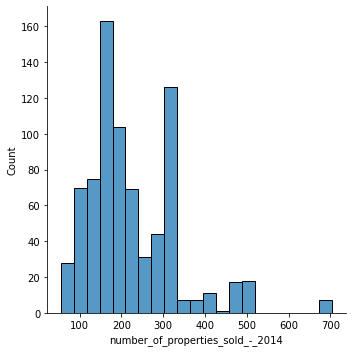

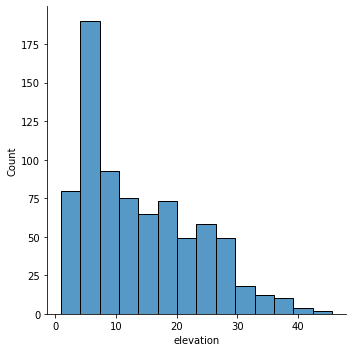

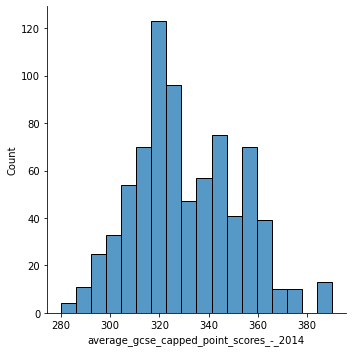

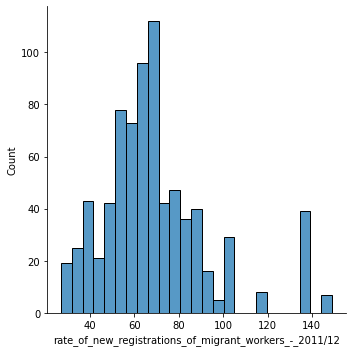

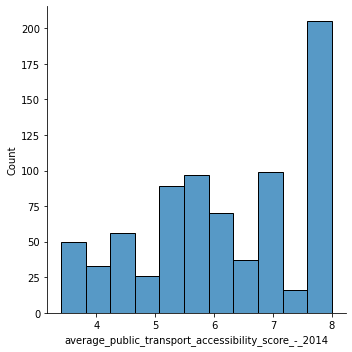

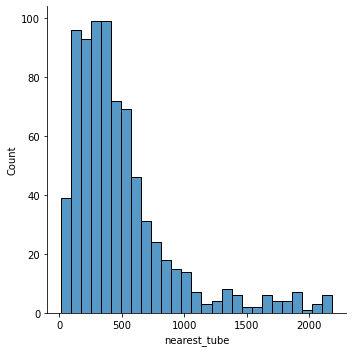

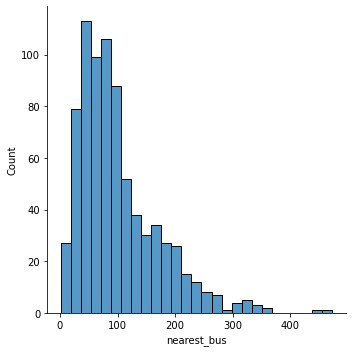

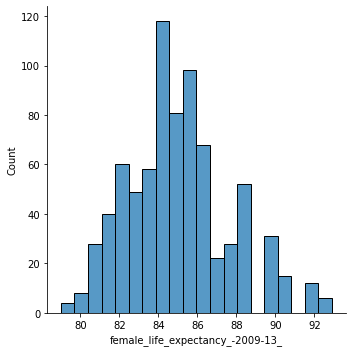

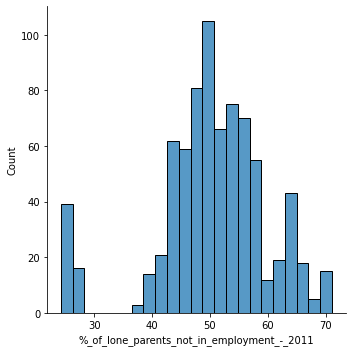

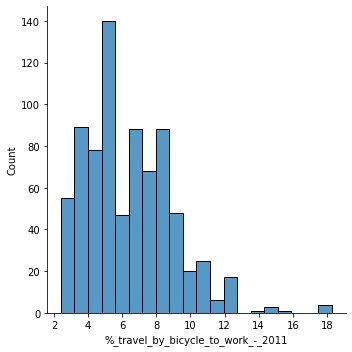

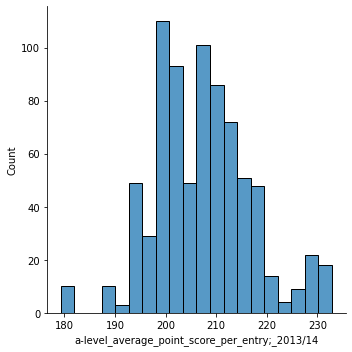

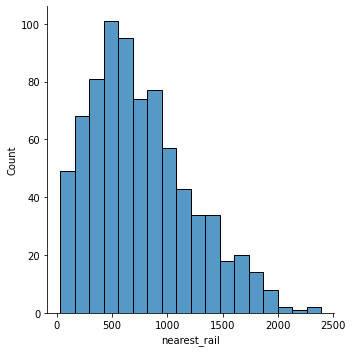

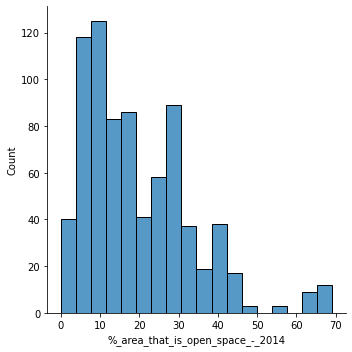

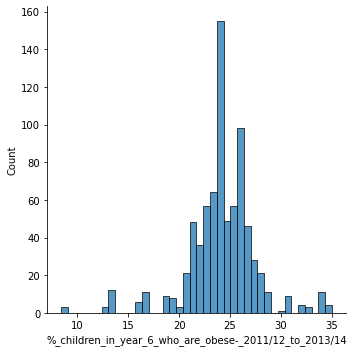

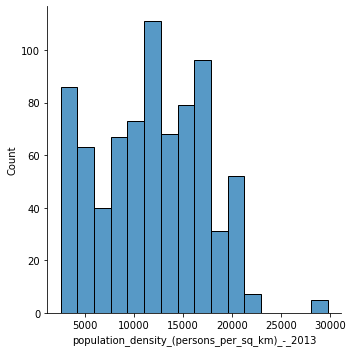

In [398]:
for i in data.drop(["description_code_x"], axis=1):
    sns.displot(data[i])
    plt.show()

Since I have very few rows of data, for now I will not remove outliers

# Transformations and encoding

*Numericals - applying transformations, tested log, BoxCox and Square Root*

In [399]:
def log_transform_clean(x):
    if x>0:
        return np.log(x)
    else:
        return 0  

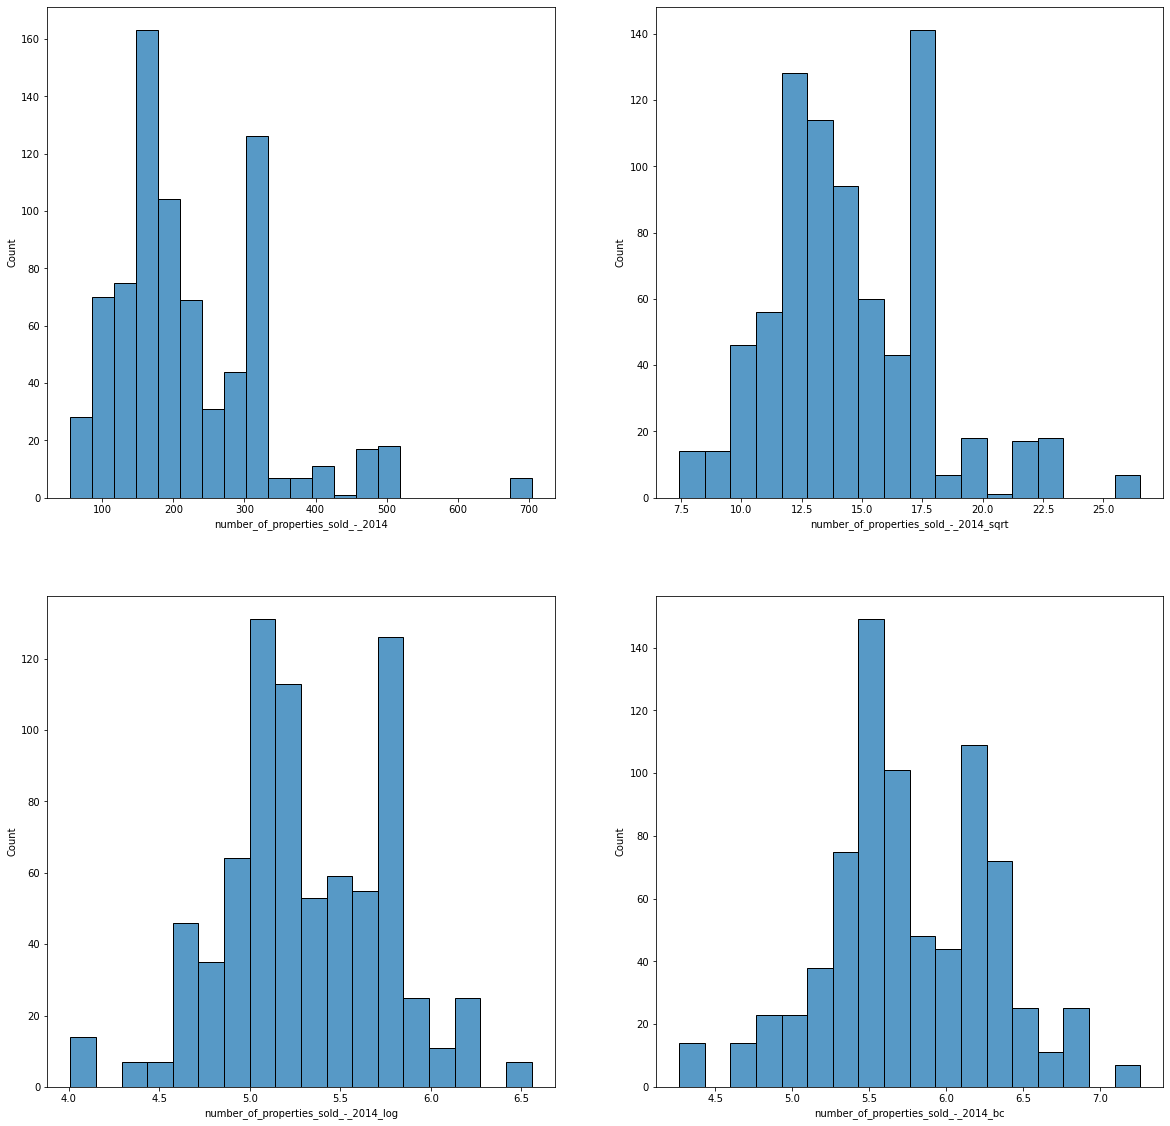

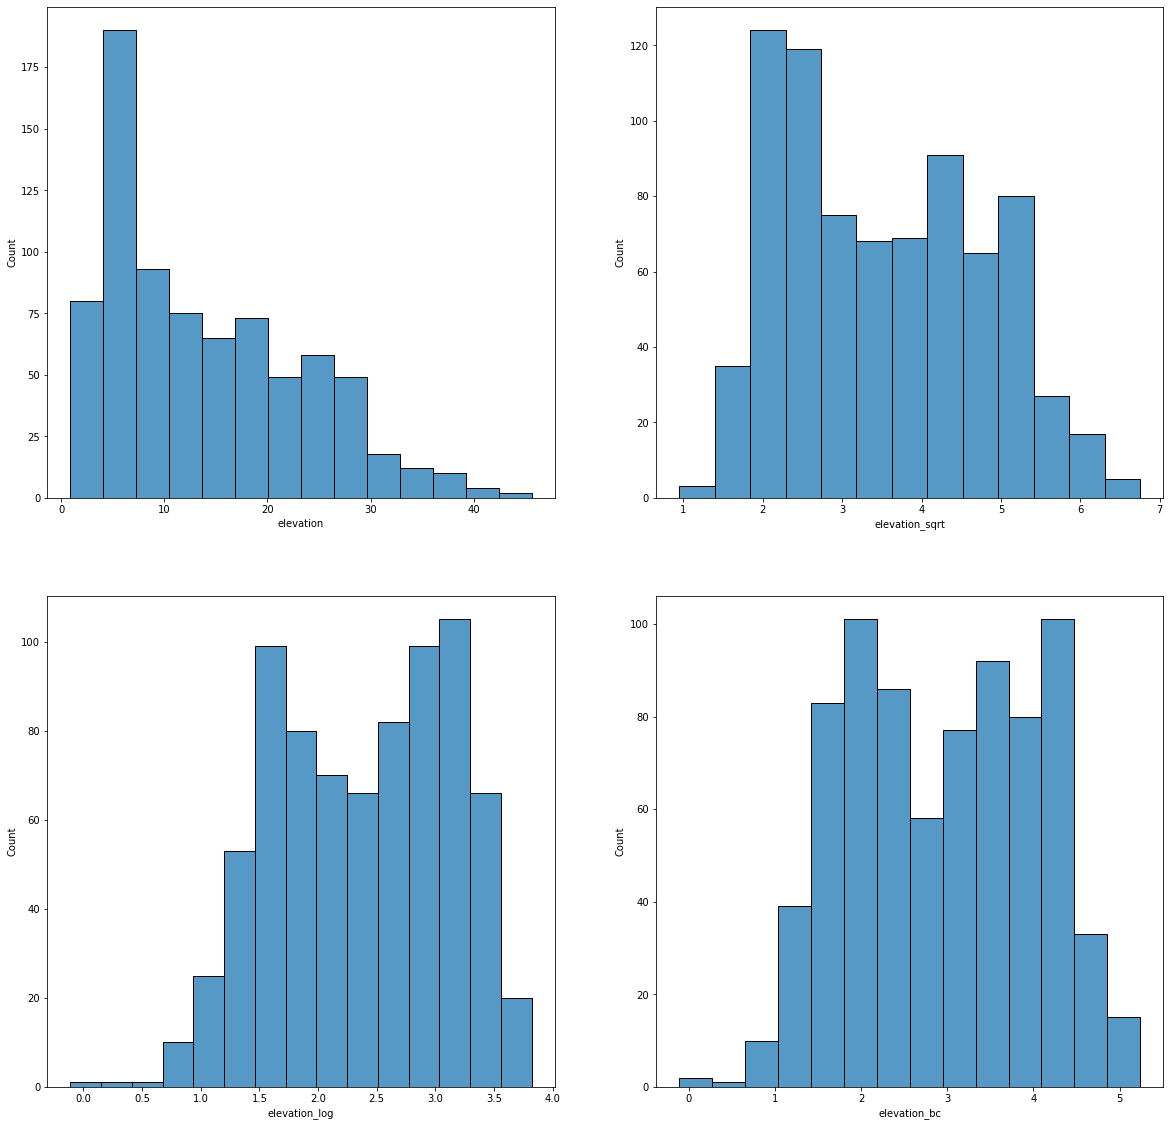

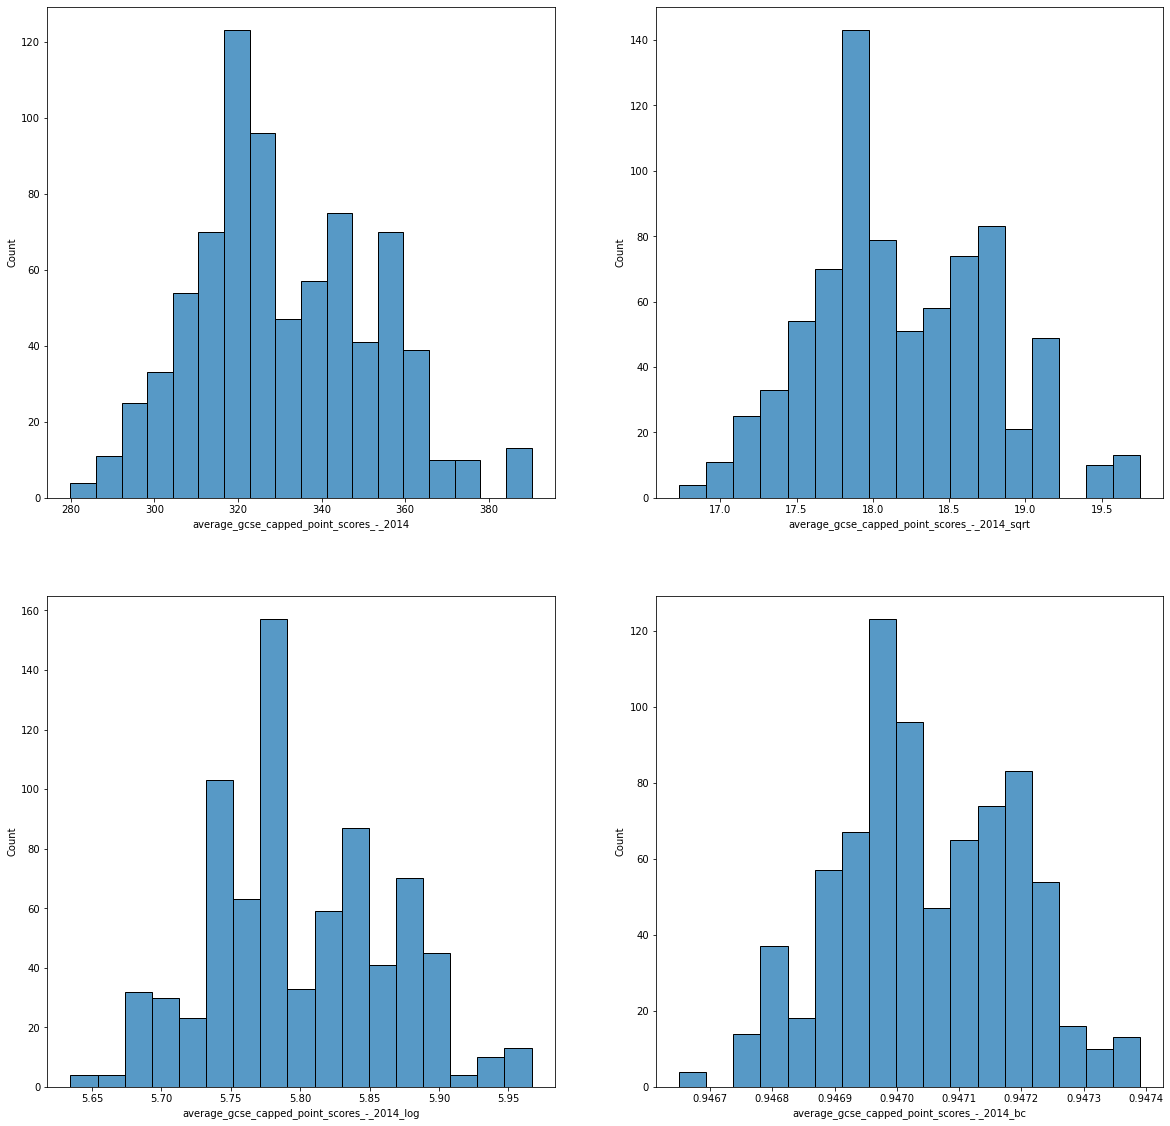

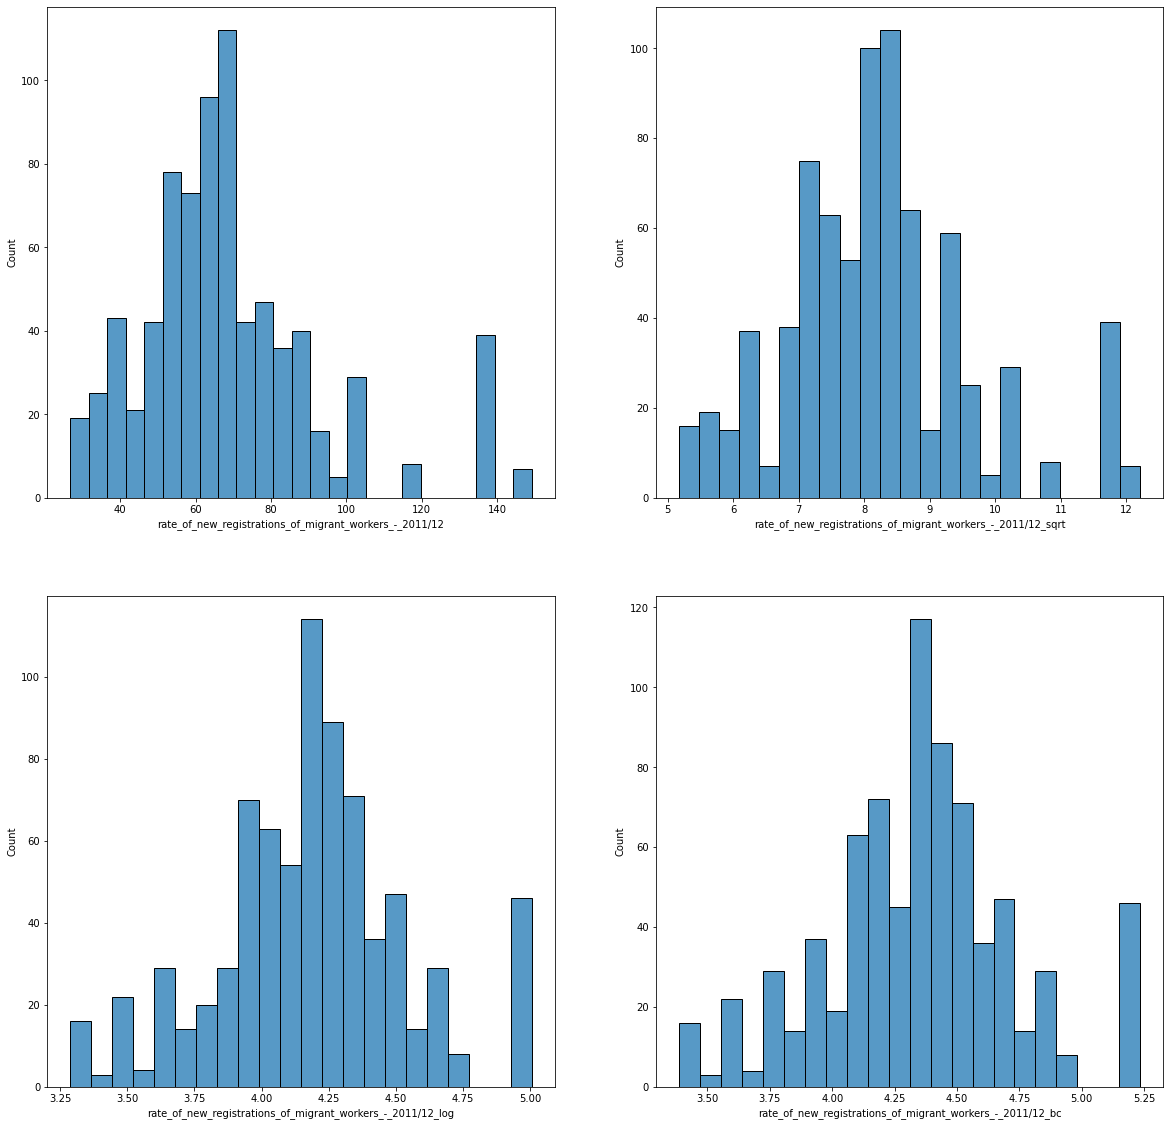

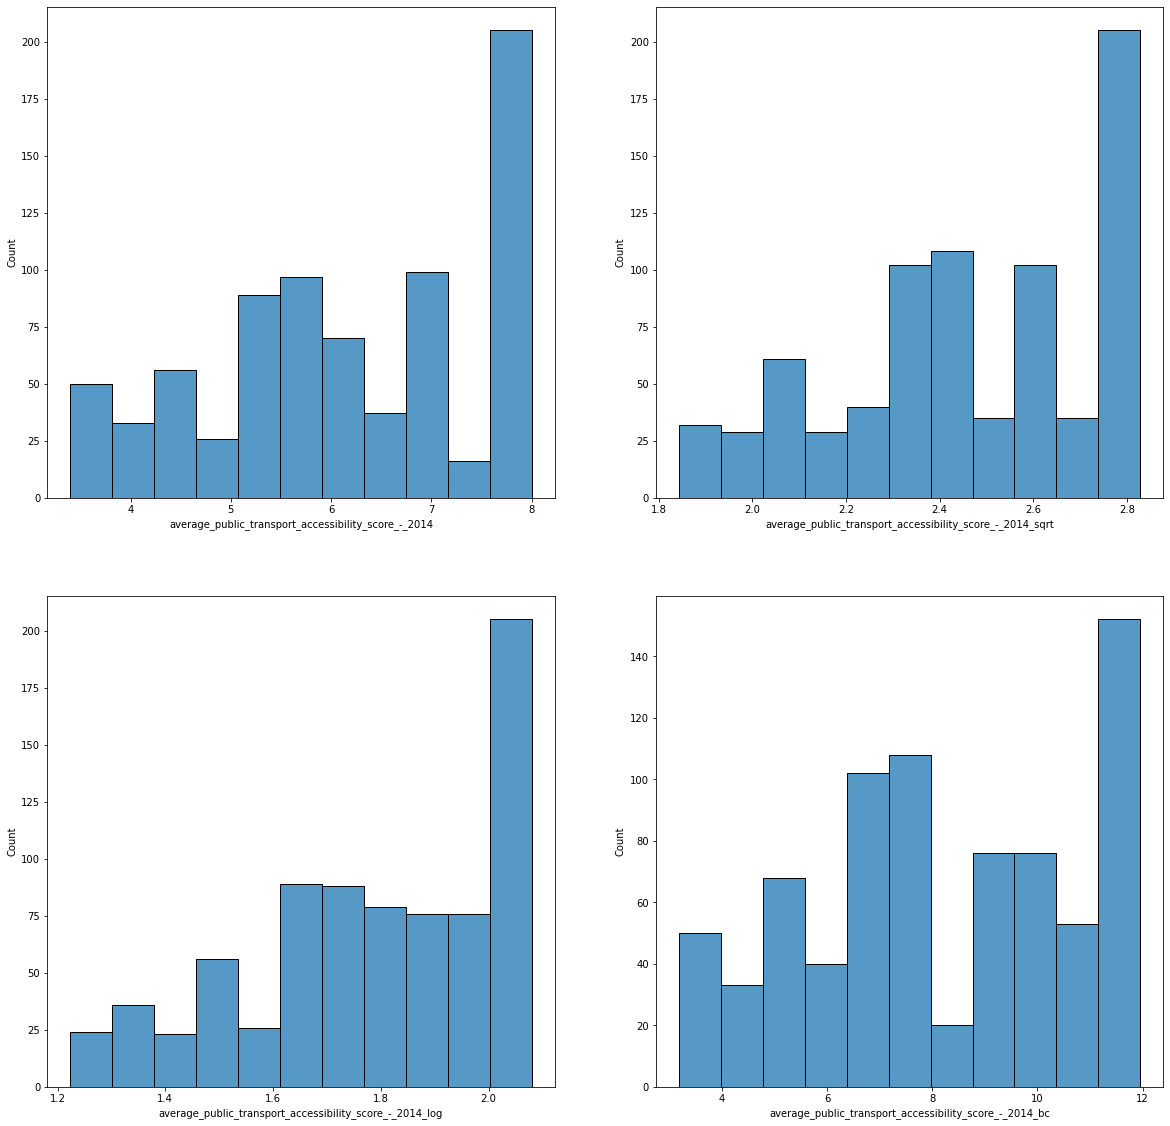

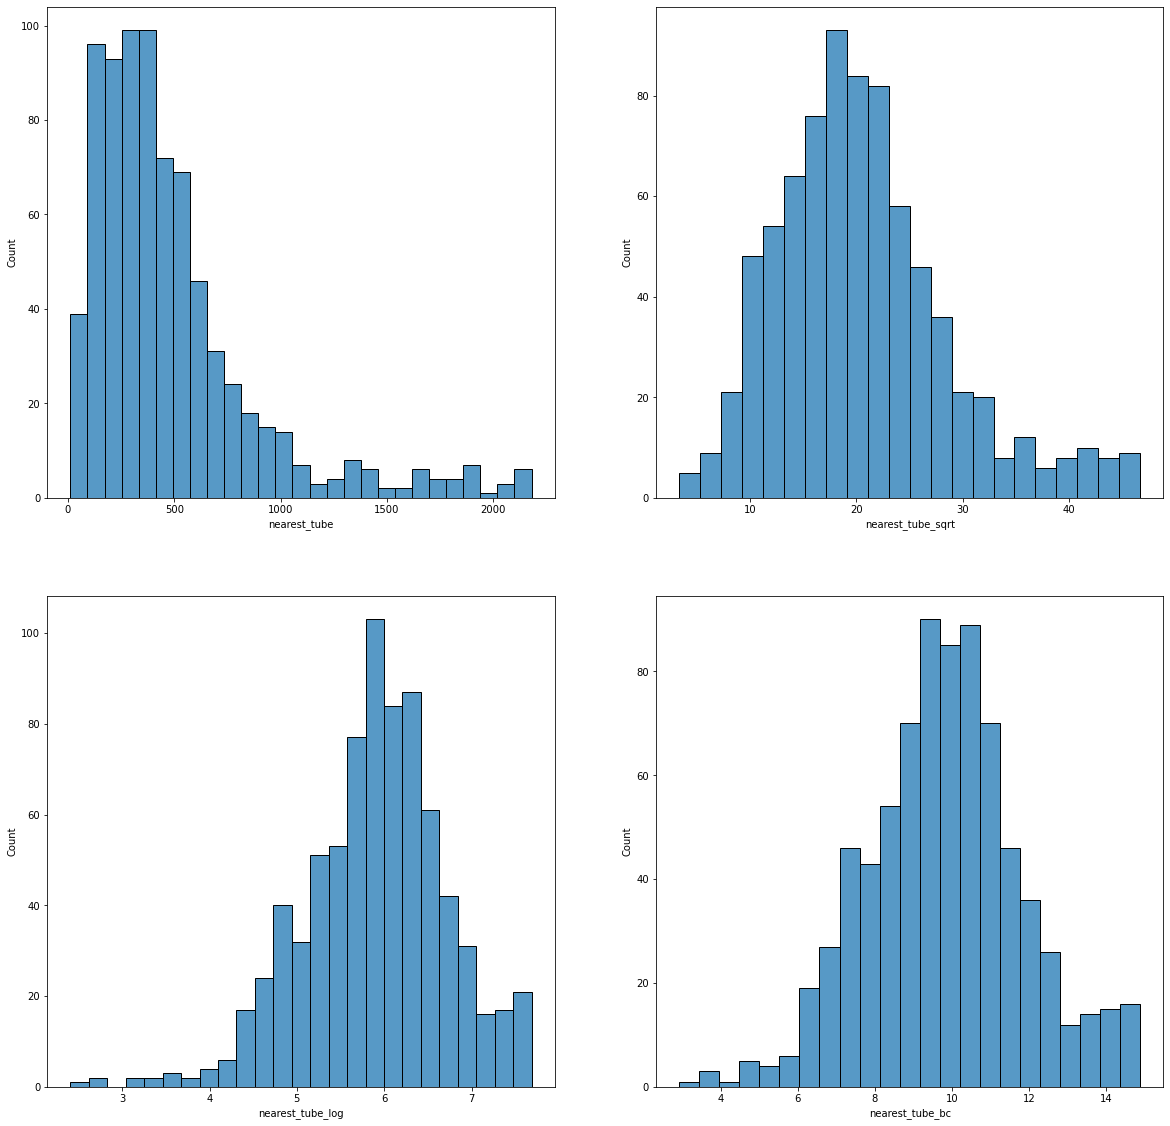

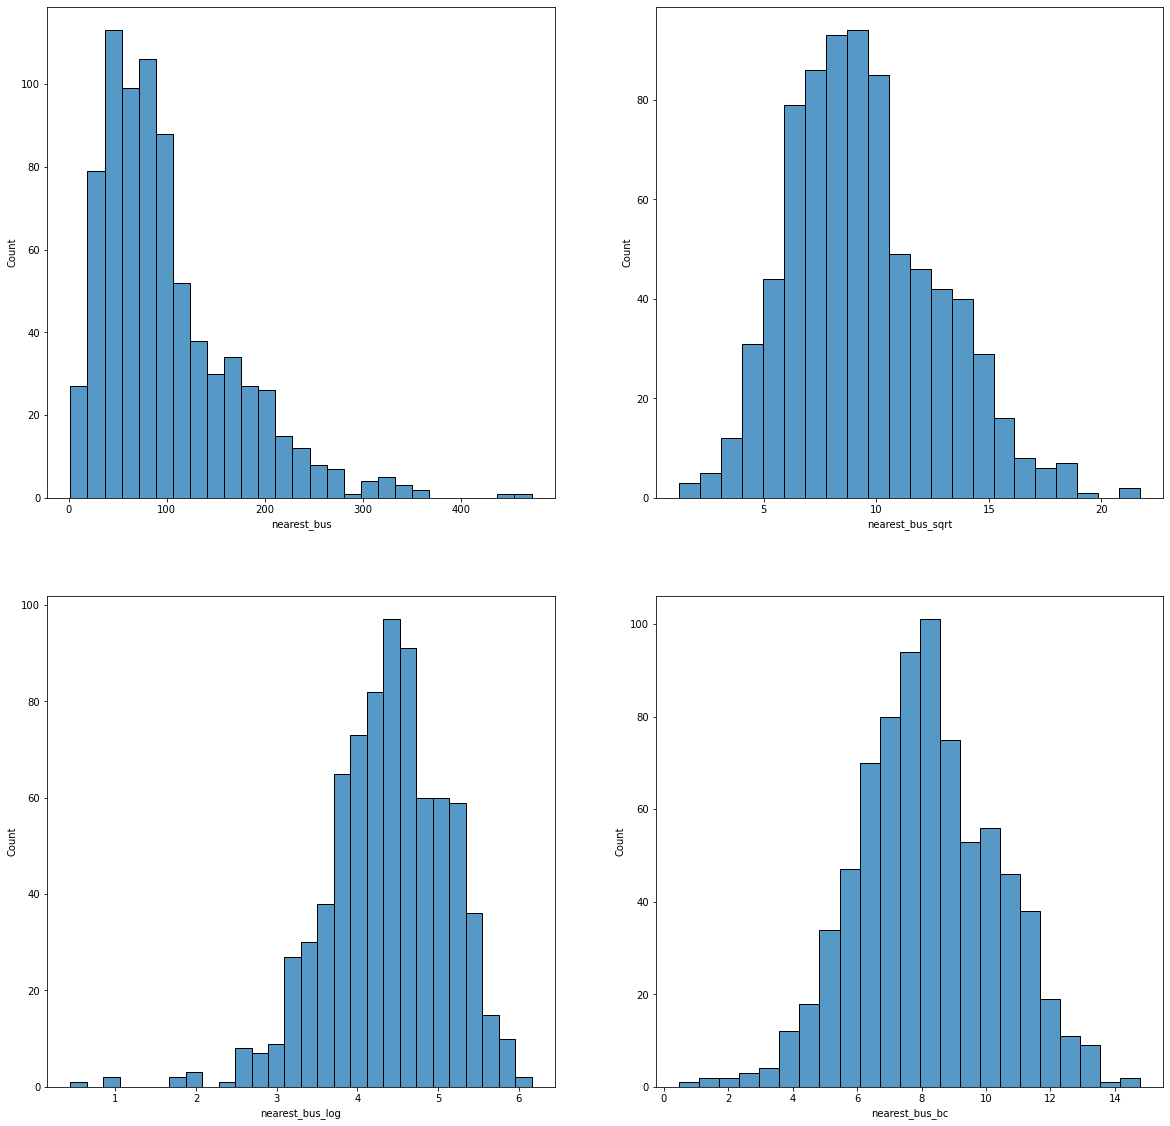

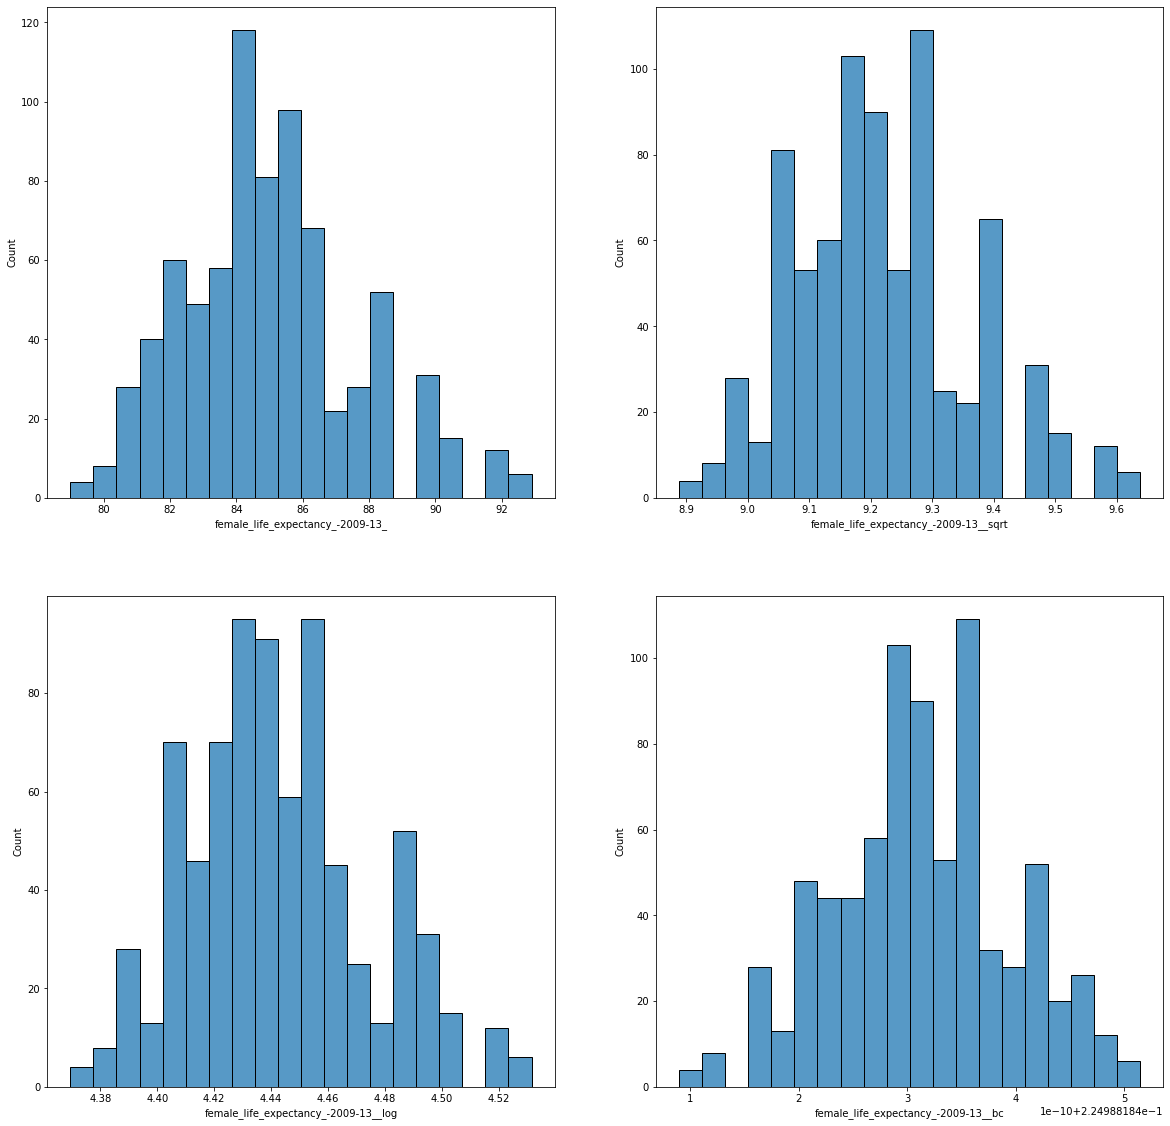

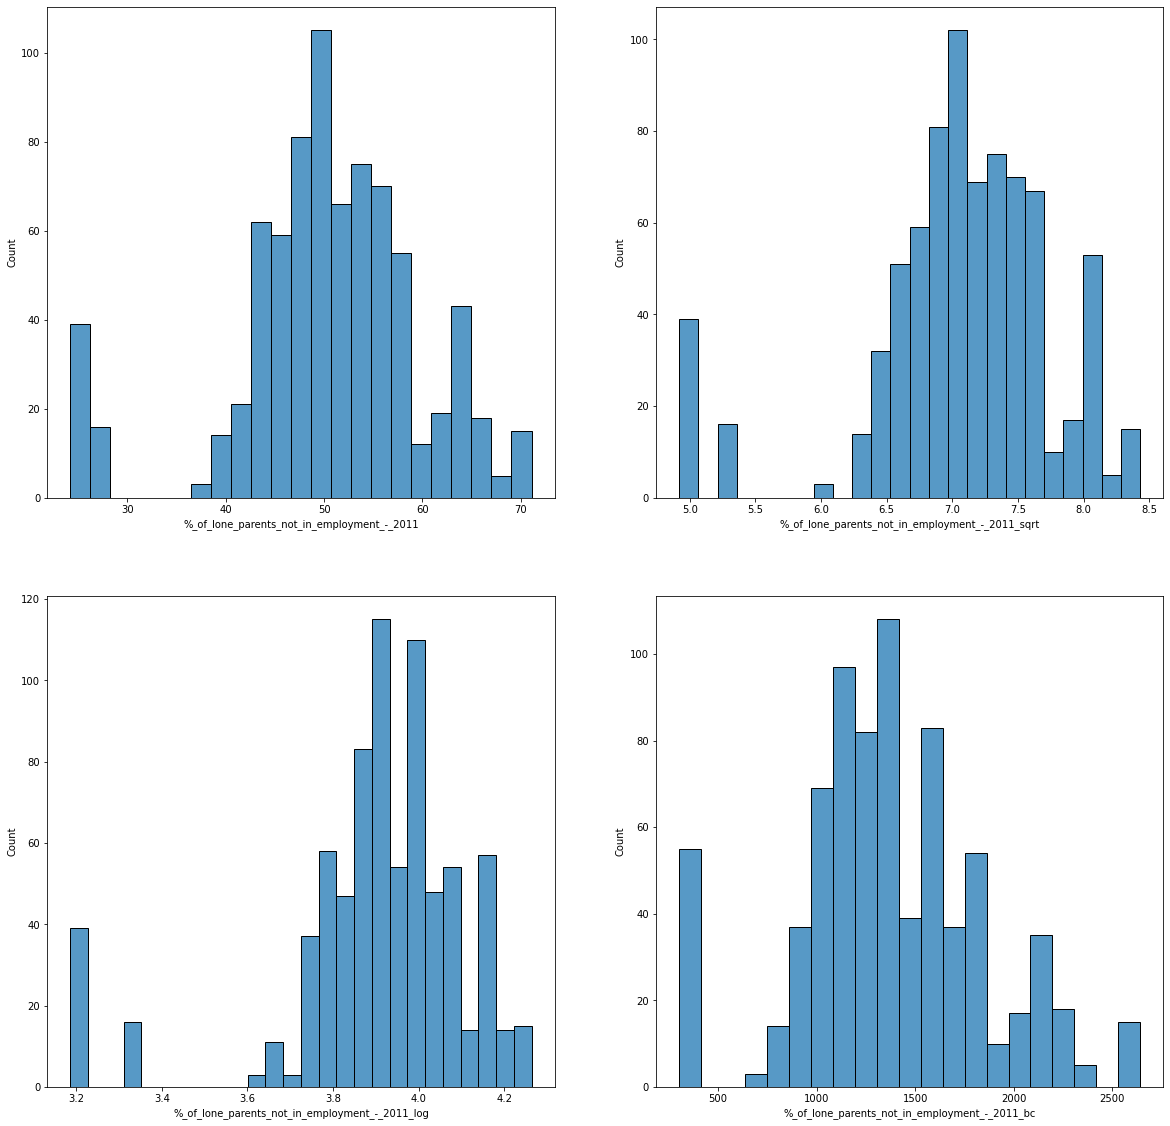

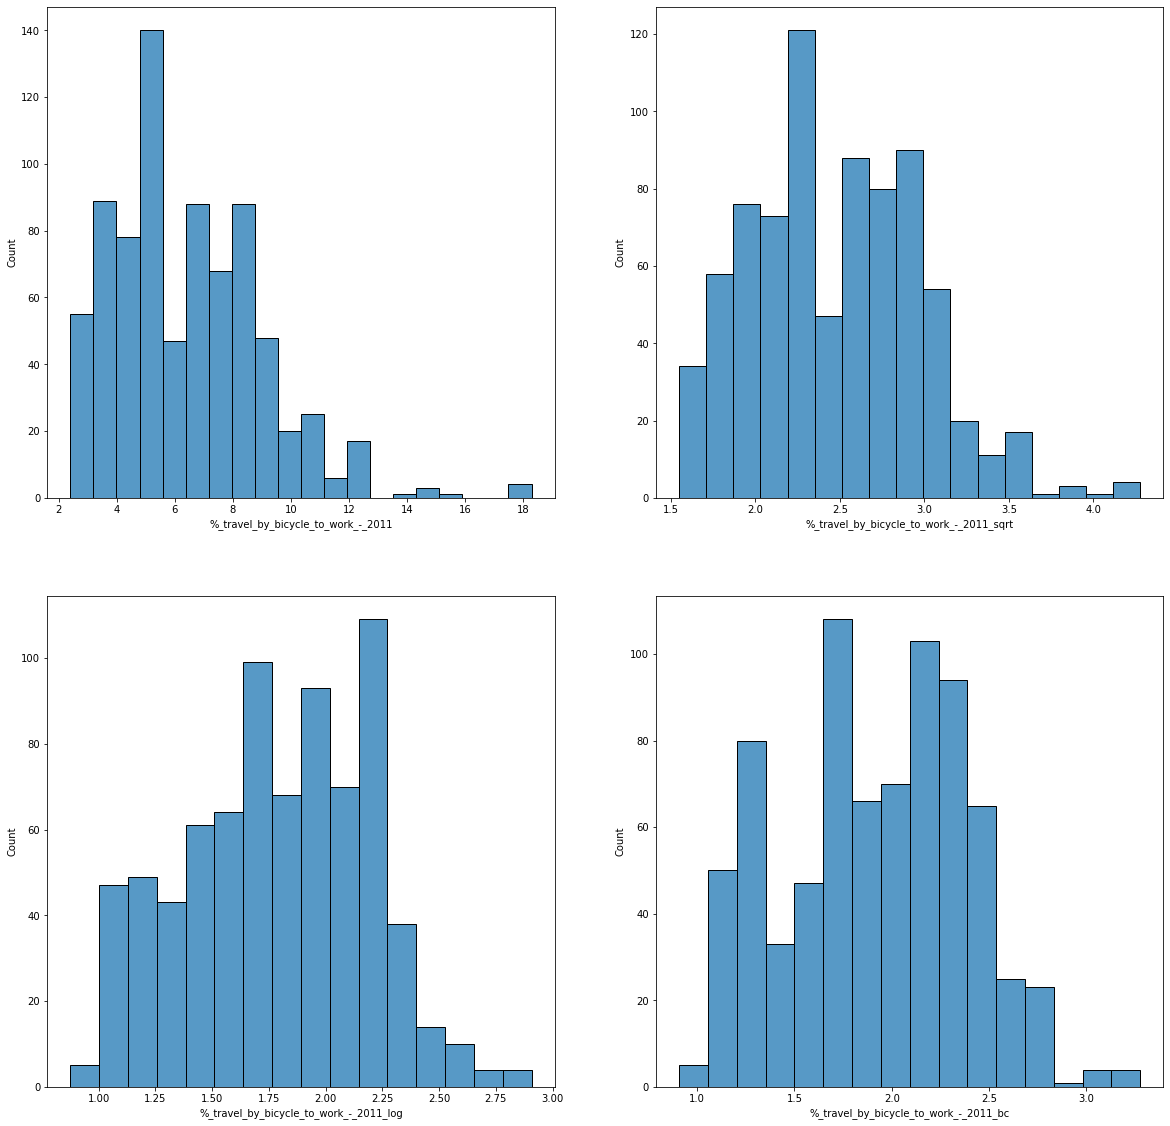

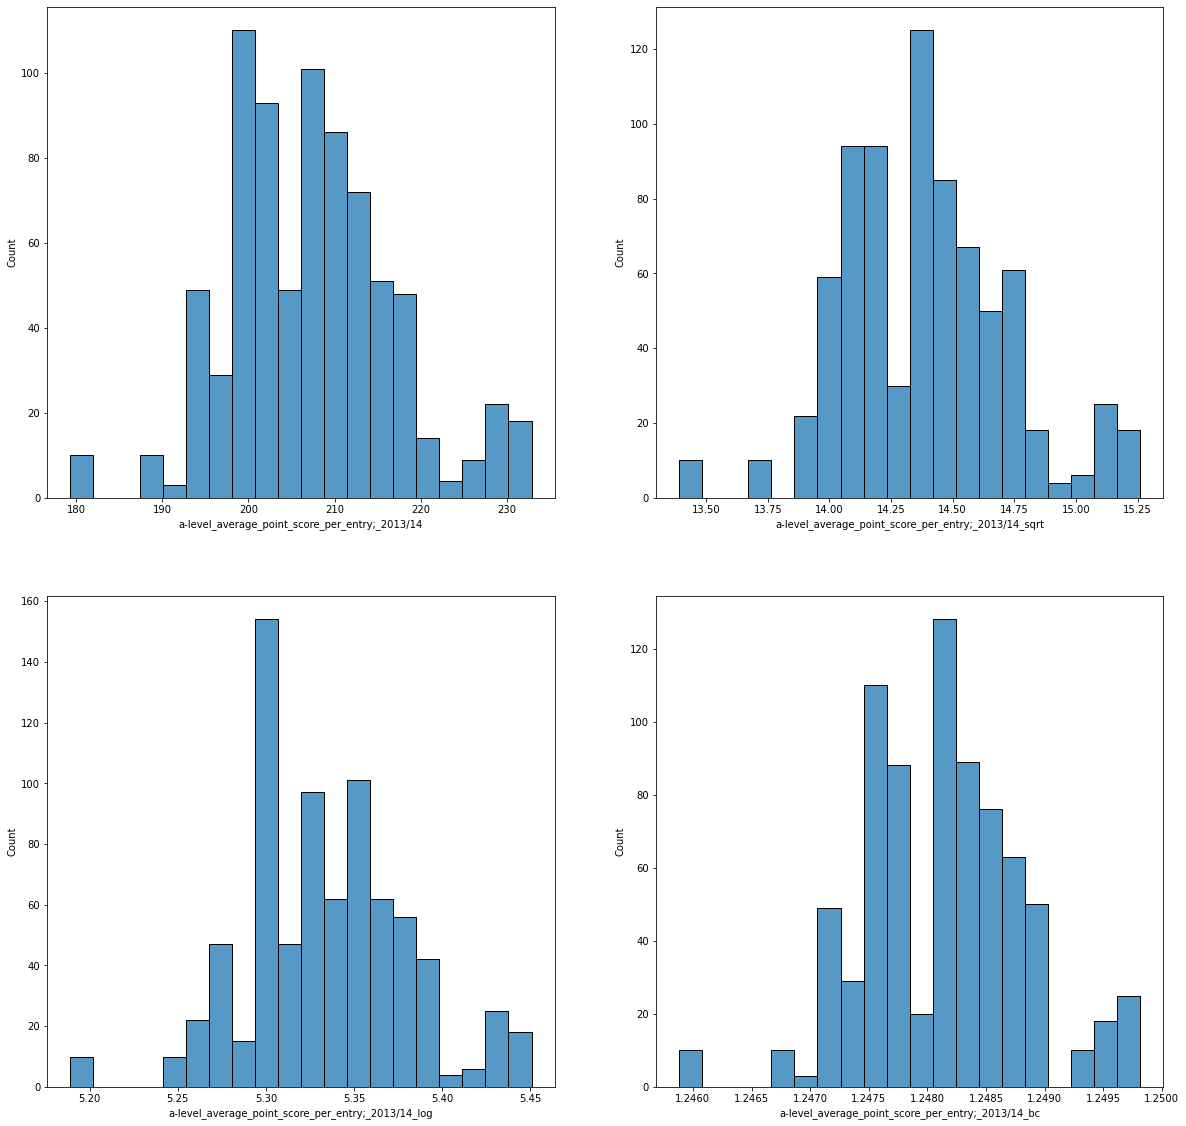

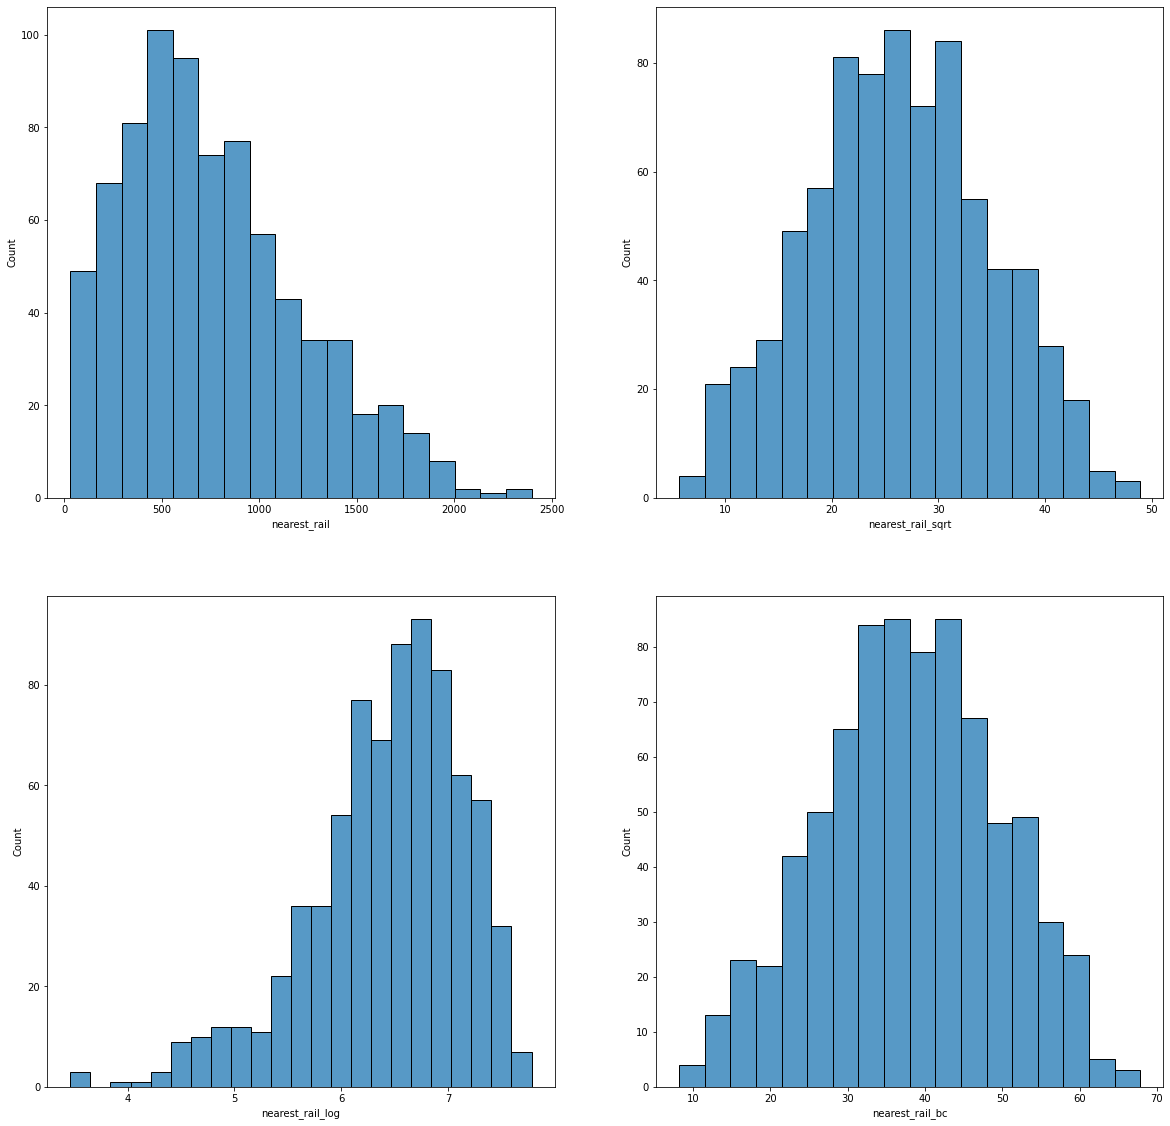

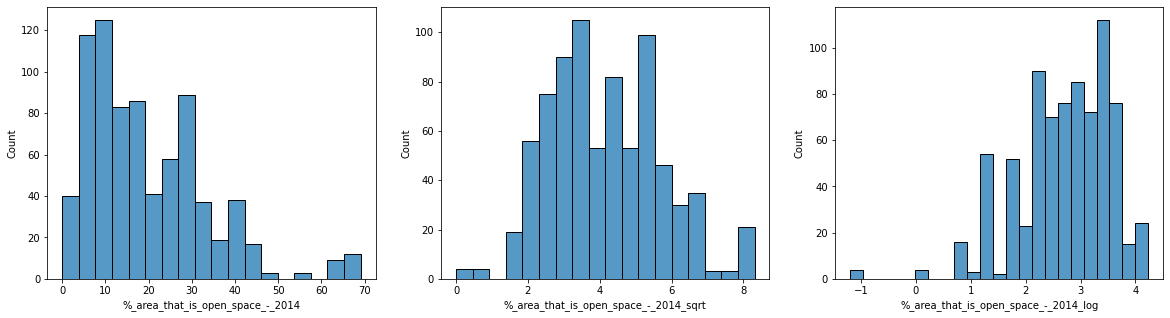

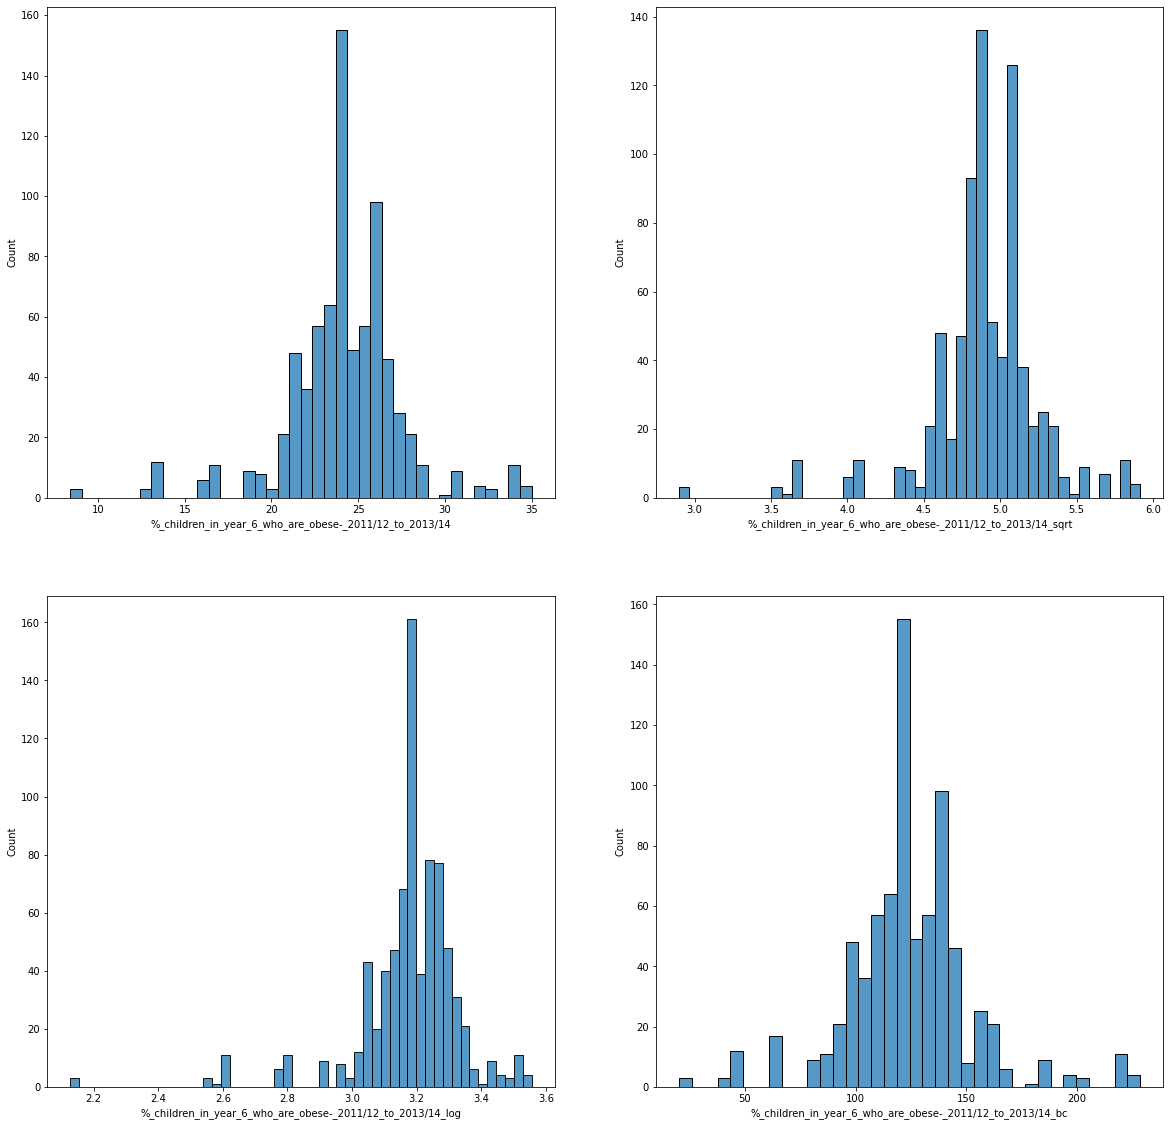

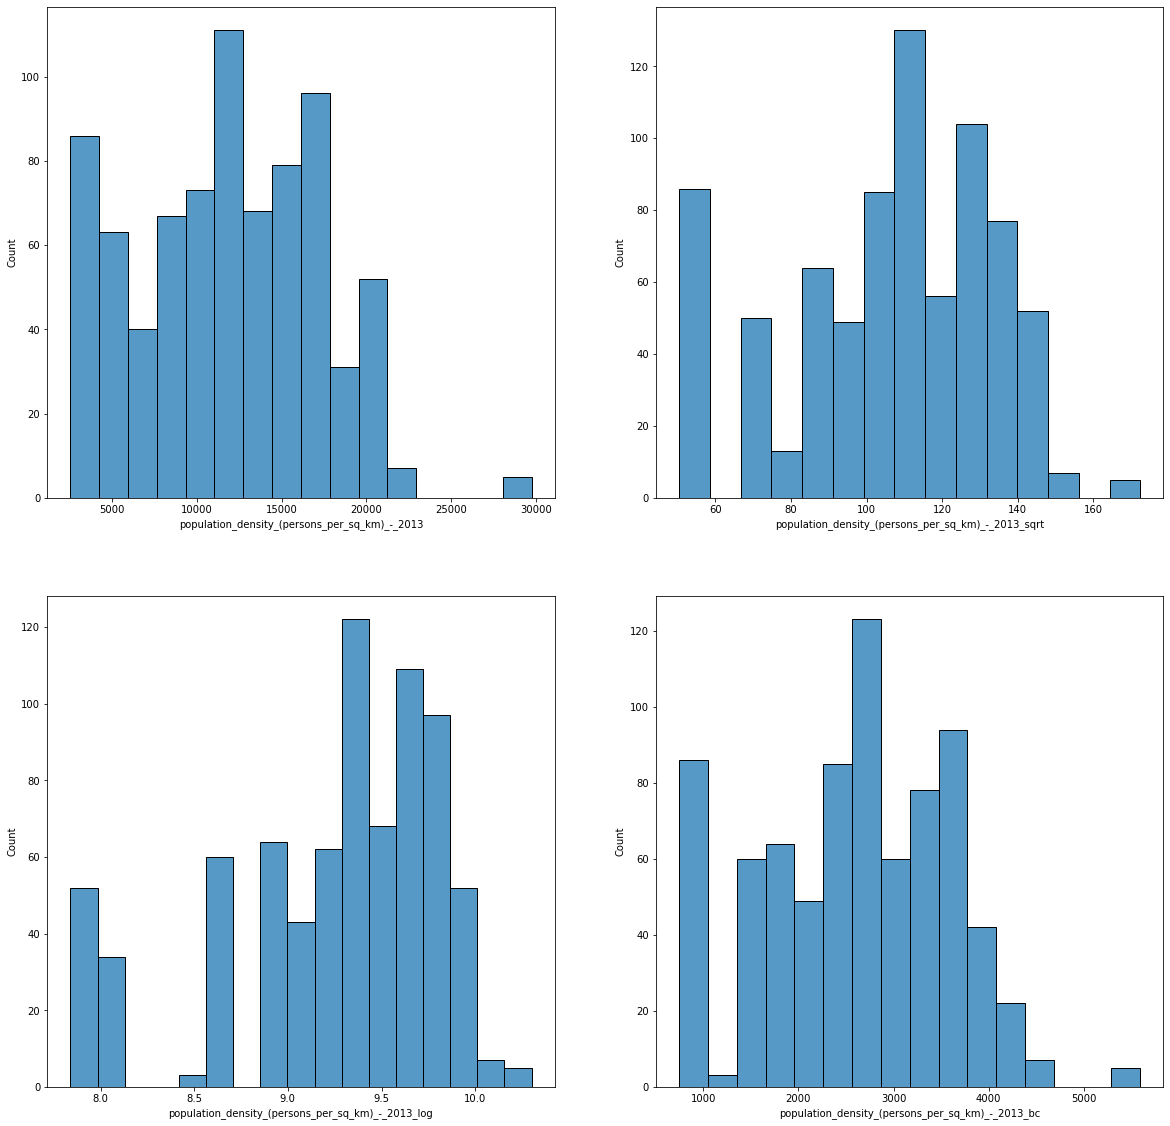

In [400]:
from scipy import stats

for name in data.columns:
    if name != "description_code_x":
        if data[name].min() > 0:

            data[name+"_sqrt"] = data[name]**(1/2)
            data[name+"_log"] = list(map(log_transform_clean, data[name]))
            box_cox, lmbda = stats.boxcox(data[name])
            data[name+"_bc"]= box_cox

            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
            plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
            sns.histplot(data[name], ax=ax1)
            sns.histplot(data[name+"_sqrt"], ax=ax2)
            sns.histplot(data[name+"_log"], ax=ax3)
            sns.histplot(data[name+"_bc"], ax=ax4)
        else:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
            data[name+"_sqrt"] = data[name]**(1/2)
            data[name+"_log"] = list(map(log_transform_clean, data[name]))
            sns.histplot(data[name], ax=ax1)
            sns.histplot(data[name+"_sqrt"], ax=ax2)
            sns.histplot(data[name+"_log"], ax=ax3)
    else: continue
        
           

In [401]:
#choosing the transformations I will use
data =data[["description_code_x",'number_of_properties_sold_-_2014_bc', 'elevation_bc', 'average_gcse_capped_point_scores_-_2014_bc',
       'rate_of_new_registrations_of_migrant_workers_-_2011/12_log',  'average_public_transport_accessibility_score_-_2014_bc',
        'nearest_tube_bc', 'nearest_bus_bc', 'female_life_expectancy_-2009-13__bc',
        '%_of_lone_parents_not_in_employment_-_2011', '%_travel_by_bicycle_to_work_-_2011_log',
        'a-level_average_point_score_per_entry;_2013/14', 'nearest_rail_bc', '%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc',
        'population_density_(persons_per_sq_km)_-_2013_sqrt',
        '%_area_that_is_open_space_-_2014_sqrt']]

In [402]:
data.shape

(778, 16)

*Apply scaling to numerical values*

In [403]:
cat = data[data.select_dtypes(np.object).columns]
num = data[data.select_dtypes(np.number).columns]

In [465]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

transformer = StandardScaler().fit(num)
num_standardized = transformer.transform(num)

transformer2=Normalizer().fit(num)
num_normalized = transformer.transform(num)

In [405]:
num_standardized = pd.DataFrame(num_standardized, index=num.index)
num_standardized.columns = num.columns
num_standardized.head()

,number_of_properties_sold_-_2014_bc,elevation_bc,average_gcse_capped_point_scores_-_2014_bc,rate_of_new_registrations_of_migrant_workers_-_2011/12_log,average_public_transport_accessibility_score_-_2014_bc,nearest_tube_bc,nearest_bus_bc,female_life_expectancy_-2009-13__bc,%_of_lone_parents_not_in_employment_-_2011,%_travel_by_bicycle_to_work_-_2011_log,a-level_average_point_score_per_entry;_2013/14,nearest_rail_bc,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc,population_density_(persons_per_sq_km)_-_2013_sqrt,%_area_that_is_open_space_-_2014_sqrt
0,0.306638,0.040136,-1.043735,0.860903,-0.307823,-0.238043,2.286022,-0.605907,-0.649735,-2.268739,-0.506379,-0.787603,-0.396718,-1.209641,1.627634
1,0.306638,-0.036015,-1.043735,0.860903,-0.307823,-1.573130,-0.727931,-0.605907,-0.649735,-2.268739,-0.506379,-1.811291,-0.396718,-1.209641,1.627634
2,0.306638,0.138922,-1.043735,0.860903,-0.307823,0.491921,3.044302,-0.605907,-0.649735,-2.268739,-0.506379,-0.118530,-0.396718,-1.209641,1.627634
3,0.306638,-0.218351,-1.043735,0.860903,-0.307823,-1.528057,0.622090,-0.605907,-0.649735,-2.268739,-0.506379,-1.951054,-0.396718,-1.209641,1.627634
4,0.306638,-0.848273,-1.043735,0.860903,-0.307823,0.337946,-0.061065,-0.605907,-0.649735,-2.268739,-0.506379,-0.444311,-0.396718,-1.209641,1.627634


In [466]:
num_normalized = pd.DataFrame(num_normalized, index=num.index)
num_normalized.columns = num.columns
num_normalized.head()

,number_of_properties_sold_-_2014_bc,elevation_bc,average_gcse_capped_point_scores_-_2014_bc,rate_of_new_registrations_of_migrant_workers_-_2011/12_log,average_public_transport_accessibility_score_-_2014_bc,nearest_tube_bc,nearest_bus_bc,female_life_expectancy_-2009-13__bc,%_of_lone_parents_not_in_employment_-_2011,%_travel_by_bicycle_to_work_-_2011_log,a-level_average_point_score_per_entry;_2013/14,nearest_rail_bc,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc,population_density_(persons_per_sq_km)_-_2013_sqrt,%_area_that_is_open_space_-_2014_sqrt
0,0.306638,0.040136,-1.043735,0.860903,-0.307823,-0.238043,2.286022,-0.605907,-0.649735,-2.268739,-0.506379,-0.787603,-0.396718,-1.209641,1.627634
1,0.306638,-0.036015,-1.043735,0.860903,-0.307823,-1.573130,-0.727931,-0.605907,-0.649735,-2.268739,-0.506379,-1.811291,-0.396718,-1.209641,1.627634
2,0.306638,0.138922,-1.043735,0.860903,-0.307823,0.491921,3.044302,-0.605907,-0.649735,-2.268739,-0.506379,-0.118530,-0.396718,-1.209641,1.627634
3,0.306638,-0.218351,-1.043735,0.860903,-0.307823,-1.528057,0.622090,-0.605907,-0.649735,-2.268739,-0.506379,-1.951054,-0.396718,-1.209641,1.627634
4,0.306638,-0.848273,-1.043735,0.860903,-0.307823,0.337946,-0.061065,-0.605907,-0.649735,-2.268739,-0.506379,-0.444311,-0.396718,-1.209641,1.627634


*Apply One Hot Encoding to Categorical features* 

In [406]:
from sklearn.preprocessing import OneHotEncoder
cat_cols= cat.columns
one_hot_data=pd.get_dummies(cat[cat_cols], drop_first=True)
cat=pd.concat([cat, one_hot_data], axis=1)   # concat dataframes
cat.drop(columns=cat_cols, inplace=True)
cat.head()

,description_code_x_NR,description_code_x_PR,description_code_x_R,description_code_x_U
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1


In [467]:
X = pd.concat([num_normalized, cat], axis=1)
X.head()

,number_of_properties_sold_-_2014_bc,elevation_bc,average_gcse_capped_point_scores_-_2014_bc,rate_of_new_registrations_of_migrant_workers_-_2011/12_log,average_public_transport_accessibility_score_-_2014_bc,nearest_tube_bc,nearest_bus_bc,female_life_expectancy_-2009-13__bc,%_of_lone_parents_not_in_employment_-_2011,%_travel_by_bicycle_to_work_-_2011_log,a-level_average_point_score_per_entry;_2013/14,nearest_rail_bc,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc,population_density_(persons_per_sq_km)_-_2013_sqrt,%_area_that_is_open_space_-_2014_sqrt,description_code_x_NR,description_code_x_PR,description_code_x_R,description_code_x_U
0,0.306638,0.040136,-1.043735,0.860903,-0.307823,-0.238043,2.286022,-0.605907,-0.649735,-2.268739,-0.506379,-0.787603,-0.396718,-1.209641,1.627634,0,0,0,1
1,0.306638,-0.036015,-1.043735,0.860903,-0.307823,-1.573130,-0.727931,-0.605907,-0.649735,-2.268739,-0.506379,-1.811291,-0.396718,-1.209641,1.627634,0,0,1,0
2,0.306638,0.138922,-1.043735,0.860903,-0.307823,0.491921,3.044302,-0.605907,-0.649735,-2.268739,-0.506379,-0.118530,-0.396718,-1.209641,1.627634,0,0,1,0
3,0.306638,-0.218351,-1.043735,0.860903,-0.307823,-1.528057,0.622090,-0.605907,-0.649735,-2.268739,-0.506379,-1.951054,-0.396718,-1.209641,1.627634,1,0,0,0
4,0.306638,-0.848273,-1.043735,0.860903,-0.307823,0.337946,-0.061065,-0.605907,-0.649735,-2.268739,-0.506379,-0.444311,-0.396718,-1.209641,1.627634,0,0,0,1


# Run Models

In [470]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [471]:
lm=LinearRegression()    # model
lm.fit(X_train, y_train)   # model train
predictions=lm.predict(X_test)   # model prediction
r2 = r2_score(y_test, predictions)
print(r2)
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

0.17560547063570453
11752.585432956905


In [483]:
import statsmodels.api as sm
import pandas as pd
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_usage   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     11.01
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.46e-29
Time:                        16:16:01   Log-Likelihood:                -8529.3
No. Observations:                 778   AIC:                         1.710e+04
Df Residuals:                     758   BIC:                         1.719e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [473]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=12, random_state=0)

In [474]:
predictions=regressor.predict(X_test)   # model prediction
r2 = r2_score(y_test, predictions)
print(r2)
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

0.1819402270562427
11707.344146183452


In [475]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)
print("KNN:")
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(r2)
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

KNN:
0.24600914965364062
11239.549496090376


# Feature Importance for different models

Feature: 0, Score: 1468.73752
Feature: 1, Score: -39.46511
Feature: 2, Score: 157.98316
Feature: 3, Score: -41.50035
Feature: 4, Score: 4780.89404
Feature: 5, Score: -1163.13302
Feature: 6, Score: -409.95621
Feature: 7, Score: 360.01490
Feature: 8, Score: -351.57292
Feature: 9, Score: 1368.82845
Feature: 10, Score: -1484.79911
Feature: 11, Score: -1338.44475
Feature: 12, Score: 406.75438
Feature: 13, Score: -1766.15611
Feature: 14, Score: 201.20073
Feature: 15, Score: 2987.73682
Feature: 16, Score: -1830.21869
Feature: 17, Score: -2708.91110
Feature: 18, Score: 505.02181


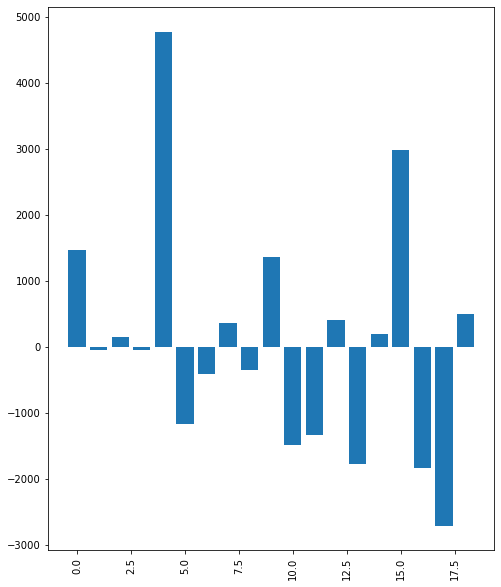

In [481]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(rotation='vertical')
pyplot.show()

Feature: 0, Score: 0.03130
Feature: 1, Score: 0.11497
Feature: 2, Score: 0.02192
Feature: 3, Score: 0.03776
Feature: 4, Score: 0.13009
Feature: 5, Score: 0.13335
Feature: 6, Score: 0.12388
Feature: 7, Score: 0.01546
Feature: 8, Score: 0.02165
Feature: 9, Score: 0.03565
Feature: 10, Score: 0.02156
Feature: 11, Score: 0.18072
Feature: 12, Score: 0.01250
Feature: 13, Score: 0.05869
Feature: 14, Score: 0.01582
Feature: 15, Score: 0.01774
Feature: 16, Score: 0.00565
Feature: 17, Score: 0.01142
Feature: 18, Score: 0.00985


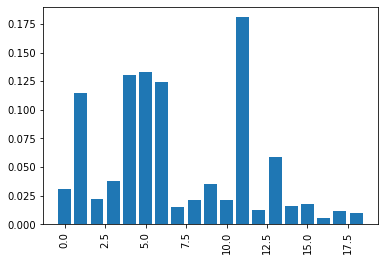

In [461]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y["total_usage"])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(rotation='vertical')
pyplot.show()

Best alpha using built-in LassoCV: 331.363975
Best score using built-in LassoCV: 0.205946
Lasso picked 12 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

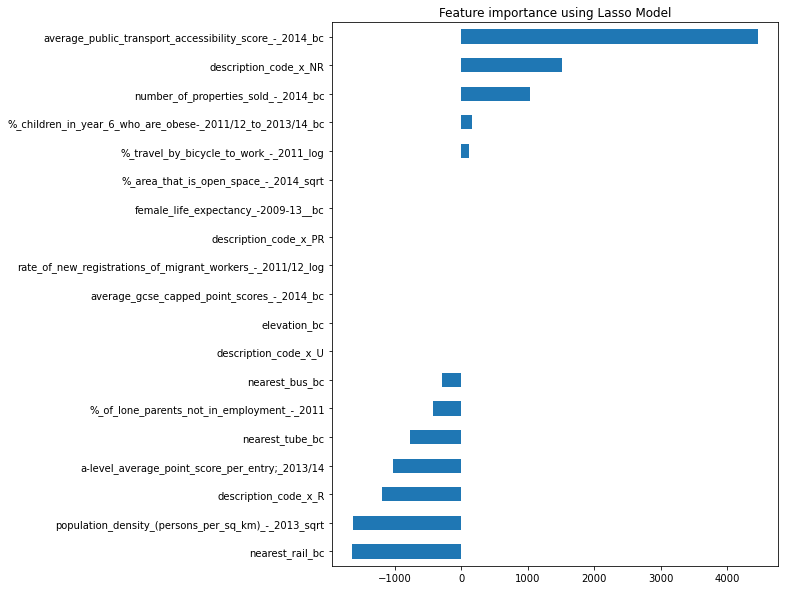

In [463]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset


reg = LassoCV()
reg.fit(X, y["total_usage"])
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")